In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pydot
import seaborn as sns
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.layers import Conv2D,MaxPooling2D,BatchNormalization
from tensorflow.keras import layers
from keras.utils.np_utils import to_categorical
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV

In [2]:
# LOAD DATA

# Step 2: Load the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
# Step 3: Normalize pixel values from [0, 255] to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0


In [7]:
# Step 4: Reshape input to add channel dimension (for grayscale)# 4d input for cnn# batchsize,height,width,channels.
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)


In [8]:
# Step 5: Class names for human-readable output
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [9]:
# Step 6: Define the CNN model
model = keras.models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # 1st conv layer
    layers.MaxPooling2D((2, 2)),                                           # 1st pooling layer

    layers.Conv2D(64, (3, 3), activation='relu'),                          # 2nd conv layer
    layers.MaxPooling2D((2, 2)),                                           # 2nd pooling layer

    layers.Flatten(),                                                      # flatten to 1D
    layers.Dense(128, activation='relu'),                                  # hidden layer
    layers.Dense(10, activation='softmax')                                 # output layer
])


In [10]:
# Step 7: Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [11]:
# Step 8: Train the model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1)


Epoch 1/10
1688/1688 [==============================] - 24s 14ms/step - loss: 0.4603 - accuracy: 0.8341 - val_loss: 0.3584 - val_accuracy: 0.8665
Epoch 2/10
1688/1688 [==============================] - 26s 16ms/step - loss: 0.3087 - accuracy: 0.8873 - val_loss: 0.3008 - val_accuracy: 0.8895
Epoch 3/10
1688/1688 [==============================] - 25s 15ms/step - loss: 0.2598 - accuracy: 0.9050 - val_loss: 0.2777 - val_accuracy: 0.8972
Epoch 4/10
1688/1688 [==============================] - 25s 15ms/step - loss: 0.2278 - accuracy: 0.9152 - val_loss: 0.2529 - val_accuracy: 0.9112
Epoch 5/10
1688/1688 [==============================] - 25s 15ms/step - loss: 0.1994 - accuracy: 0.9261 - val_loss: 0.2465 - val_accuracy: 0.9082
Epoch 6/10
1688/1688 [==============================] - 25s 15ms/step - loss: 0.1762 - accuracy: 0.9342 - val_loss: 0.2447 - val_accuracy: 0.9142
Epoch 7/10
1688/1688 [==============================] - 26s 16ms/step - loss: 0.1541 - accuracy: 0.9422 - val_loss: 0.2719 -

In [12]:
# Step 9: Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')


313/313 - 2s - loss: 0.3182 - accuracy: 0.9057 - 2s/epoch - 5ms/step

Test accuracy: 0.9057


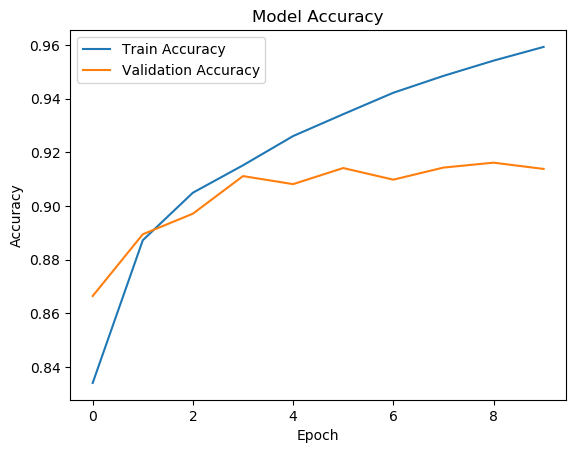

In [13]:
# Step 10: Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


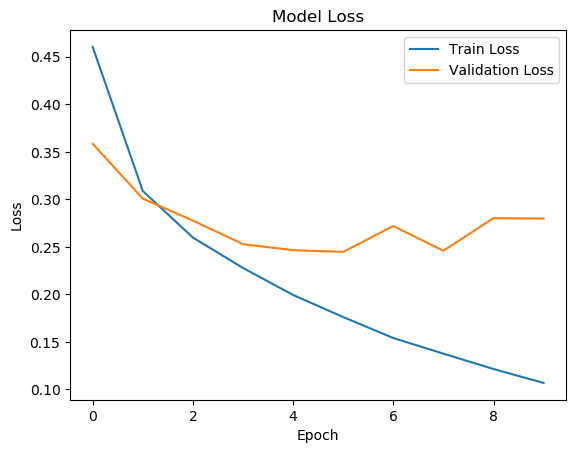

In [14]:
# Step 11: Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [15]:
# Step 12: Make predictions on test data
predictions = model.predict(X_test)
y_pred=np.argmax(predictions, axis=1)


In [16]:
predictions

array([[3.27099502e-12, 2.89456806e-14, 1.31954403e-15, ...,
        2.12550859e-07, 9.30455257e-13, 9.99999762e-01],
       [8.45854942e-08, 9.11069112e-14, 9.99994516e-01, ...,
        4.79863477e-14, 5.97077422e-12, 1.05775244e-16],
       [1.20727007e-12, 1.00000000e+00, 6.50634793e-18, ...,
        1.99855626e-22, 2.50377438e-18, 2.85729209e-28],
       ...,
       [1.80403869e-13, 7.98232962e-19, 2.47814735e-14, ...,
        7.91501211e-20, 1.00000000e+00, 5.89265270e-19],
       [5.46057774e-13, 1.00000000e+00, 1.42451838e-12, ...,
        8.51688072e-18, 3.28936287e-13, 3.59903141e-18],
       [6.72872178e-04, 2.57277613e-08, 9.85351926e-06, ...,
        3.10747739e-04, 1.18592614e-02, 2.05157085e-05]], dtype=float32)

In [17]:
y_pred[6]

4

In [18]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

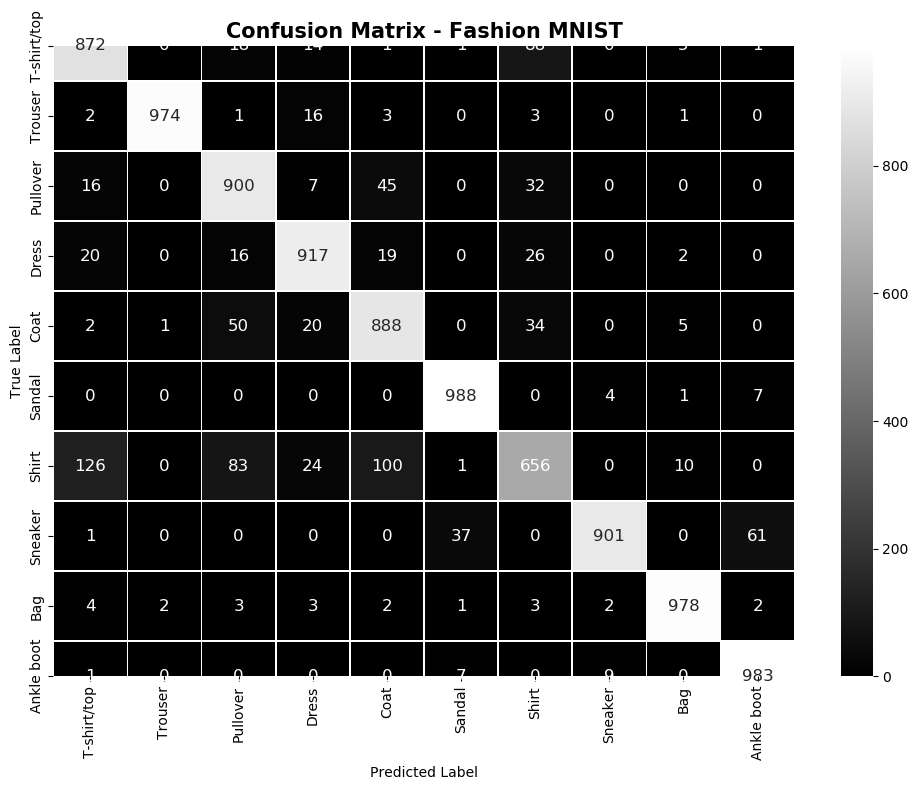

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict on the test set
predictions = model.predict(X_test)                 # shape: (10000, 10)
y_pred = np.argmax(predictions, axis=1)             # shape: (10000,)

# DO NOT do this:
# y_test = np.argmax(y_test, axis=0) ❌ ❌

# Compute confusion matrix
con_mat = confusion_matrix(y_test, y_pred)

# Class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(con_mat,
            annot=True,
            fmt='d',
            cmap='gray',
            xticklabels=class_names,
            yticklabels=class_names,
            linewidths=0.5,
            annot_kws={'size': 12})

plt.title('Confusion Matrix - Fashion MNIST', fontsize=15, fontweight='bold')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


In [23]:
from sklearn.metrics import classification_report,accuracy_score

print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1000
           1       1.00      0.97      0.99      1000
           2       0.84      0.90      0.87      1000
           3       0.92      0.92      0.92      1000
           4       0.84      0.89      0.86      1000
           5       0.95      0.99      0.97      1000
           6       0.78      0.66      0.71      1000
           7       0.98      0.90      0.94      1000
           8       0.98      0.98      0.98      1000
           9       0.93      0.98      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.90     10000
weighted avg       0.91      0.91      0.90     10000

0.9057
